In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

In [3]:
# Load dataset
df = pd.read_csv("diabetes.csv")  
print(df.head())
print("\nMissing values:\n", df.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
#Replace zero-values in medical columns (they indicate missing)
zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[zero_cols] = df[zero_cols].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

print("\nDataset shape:", df.shape)
print(df.describe())


Dataset shape: (768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18

In [6]:
#Split Features & Target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
#Feature Scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train SVM Model
model = SVC(kernel="rbf", probability=True, random_state=42)
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [9]:
#Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation (SVM – Diabetes):")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)     # MOST IMPORTANT ⚠️
print("F1 Score:", f1)



Model Evaluation (SVM – Diabetes):
Accuracy: 0.7337662337662337
Precision: 0.6444444444444445
Recall: 0.5370370370370371
F1 Score: 0.5858585858585859


In [10]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[84 16]
 [25 29]]


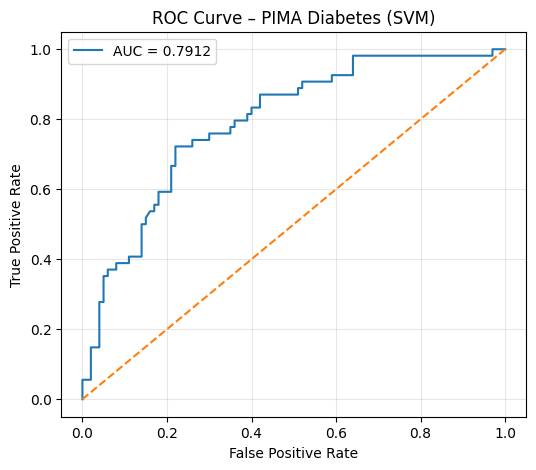

In [11]:
# ROC Curve + AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thr = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – PIMA Diabetes (SVM)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [12]:
#Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-Validation Avg Accuracy:", cv_scores.mean(), "| Scores:", cv_scores)


Cross-Validation Avg Accuracy: 0.7604872251931075 | Scores: [0.75974026 0.71428571 0.75324675 0.79084967 0.78431373]


In [13]:
#Bias–Variance Tradeoff (Compare C-parameter / model complexity)
simple_model = SVC(kernel="rbf", C=0.5, probability=True, random_state=42)
complex_model = SVC(kernel="rbf", C=5, probability=True, random_state=42)

simple_scores = cross_val_score(simple_model, X, y, cv=5)
complex_scores = cross_val_score(complex_model, X, y, cv=5)

print("\nBias–Variance Check:")
print("Simple Model Avg Accuracy:", simple_scores.mean())
print("Complex Model Avg Accuracy:", complex_scores.mean())


Bias–Variance Check:
Simple Model Avg Accuracy: 0.7513708513708514
Complex Model Avg Accuracy: 0.7695951107715813
